In [ ]:

!apt install tesseract-ocr
!apt-get install tesseract-ocr-tha
!apt install libtesseract-dev
! pip install pytesseract
 # restart runtime

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-tha is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14070 sha256=5bdde6d9a0493b187ea33d6e91ea61a84b343e1fc7ff20747bae09cee4eaca4e
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving thai_2.JPG to thai_2.JPG


In [ ]:
! ls

salary_slip_thai.jpg  sample_data  thai_2.JPG  thai.jpg


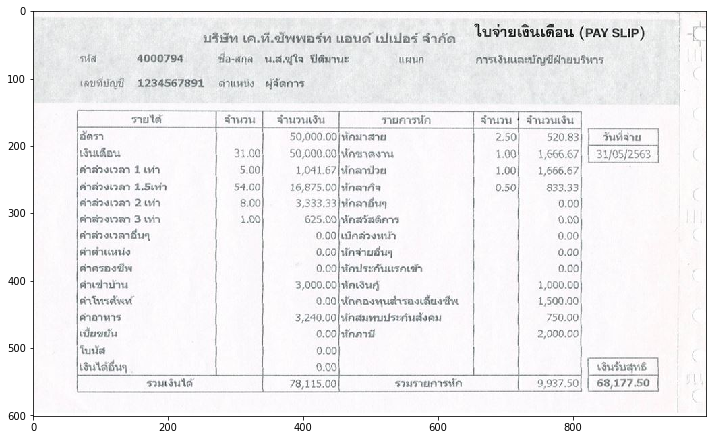

In [ ]:
#image = cv2.imread(path+"data/paper-image.jpg")
from skimage import io,transform
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("thai_2.JPG")
image = image[..., ::-1] 
image2 = np.ones((1650, 1275, 3))
image2[100:1550, 75:1125, :] = transform.resize(image, ((1550-100, 1125-75)))
    # Convert the image from BGR (cv2 default loading style)
plt.figure(figsize=(10,10))
io.imshow(image)

In [35]:
image = cv2.imread("thai_2.JPG")
results = pytesseract.image_to_string(image, lang='tha')
lines = results.split('\n')
for text in lines:
    print(text)

 

บริษัท เค.ที.ซัพพเอร์ท แอนด์ เปเปอร์ จํากัด

ใบจ่ายเงฉินเดือน (อล” ธน6)

 

 

 

 

 

 

 

 

 

รหัส         4000794       ชื่อ-สกุล น.ส.ซูใจ ปีดิมานะ           แผนก           การเงินและบัญชีฝ่ายบริหาร
เลขที่บัญชี 1234567891 ดําแหน่ง ผู้จัดการ
รายได้             จํานวน [ จํานวนเงิน            รายการหัก           ลํานวน [ จํานวนเงิน
อัตรา                                        50,000.00|หัคมาสาย                       2.50|       520.83| | วันที่จ่าย
เงินเดือน                        31.00| 50,000.00|หักขาดงาน                      1.00| 1666.67| | 3บ05/2563
คําล่วงเวลา 1 เท่า                 5.00        1.041.67|หัคลาป่วย                       1.00| 1,666.67
ค่าล่วงเวลา 1.5เท่า              54.00| 16,875.00| หักลากิจ                        0.50|( 833.33
ค่าล่วงเวลา 2 เท่า                 8.00        3,333.33|หัคลาอื่นๆ                                     0.00|
ค่าส่วงเวลา 3 เท่า                      1.00            625.00|หักสวัสดิการ                                           0.00|

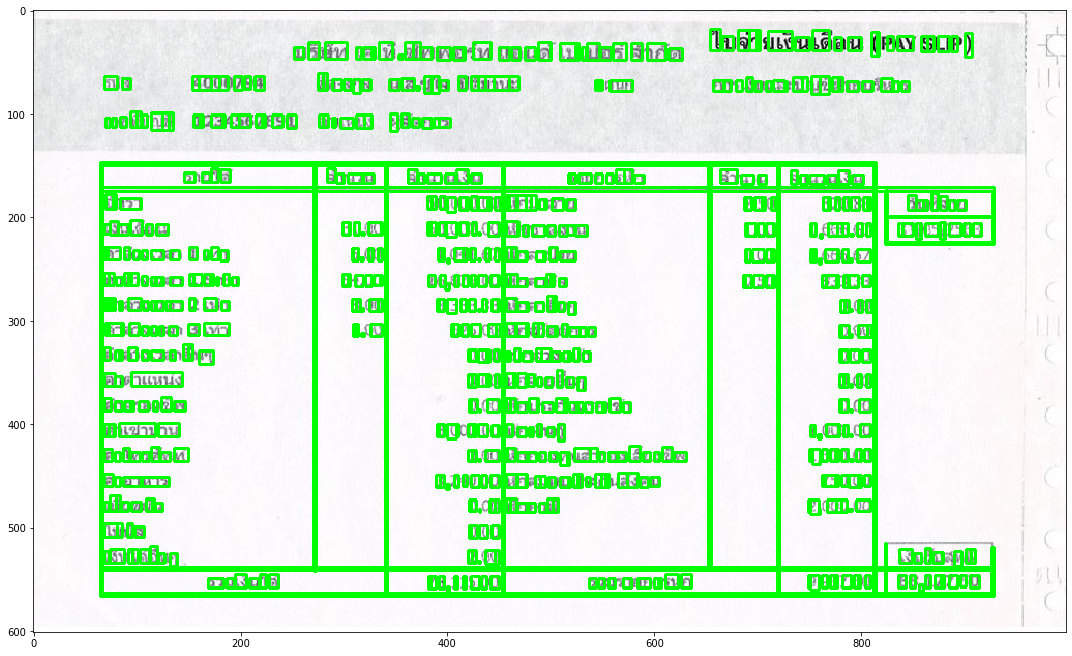

In [ ]:
import pytesseract


h, w, c = image.shape
boxes = pytesseract.image_to_boxes(image) 
for b in boxes.splitlines():
    b = b.split(' ')
    img_Umat = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
    #print(type(img_Umat), img_Umat.get().shape)
    image = img_Umat
    #break
plt.figure(figsize=(15,15))
io.imshow(img_Umat.get())


In [31]:
from pytesseract import Output


image = cv2.imread("thai_2.JPG")
d = pytesseract.image_to_data(image, output_type=Output.DICT, lang='tha')
for i in range(len(d['text'])):
    if float(d['conf'][i]) < 0.6 and len(d['text'][i]) == 0:
        continue
    left, top, width, height = d['left'][i], d['top'][i], d['width'][i], d['height'][i]
    print((d['text'][i]))
    

 
บ
ร
ิ
ษั
ท
เค
.
ท
ี
.
ซ
ั
พ
พ
เอ
ร
์
ท
แอ
น
ด
์
เป
เป
อ
ร
์
จ
ํ
า
ก
ั
ด
ใบ
จ
่
า
ย
เง
ฉิ
น
เด
ื
อ
น
(อ
ล
”
ธน
6)
 
 
 
 
 
 
 
 
 
ร
ห
ั
ส
4000794
ชื
่
อ
-
ส
ก
ุ
ล
น
.
ส
.
ซ
ู
ใจ
ป
ี
ด
ิ
ม
า
น
ะ
แผ
น
ก
ก
า
ร
เง
ิ
น
แล
ะ
บ
ั
ญ
ชี
ฝ่า
ย
บ
ร
ิ
ห
า
ร
เล
ข
ท
ี
่
บ
ั
ญ
ชี
1234567891
ด
ํ
า
แห
น
่
ง
ผู
้
จ
ั
ด
ก
า
ร
ร
า
ย
ได
้
จ
ํ
า
น
ว
น
[
จ
ํ
า
น
ว
น
เง
ิ
น
ร
า
ย
ก
า
ร
ห
ั
ก
ล
ํ
า
น
ว
น
[
จ
ํ
า
น
ว
น
เง
ิ
น
อ
ั
ต
ร
า
50,000.00|
ห
ั
ค
ม
า
ส
า
ย
2.50|
520.83|
|
ว
ั
น
ท
ี
่
จ
่
า
ย
เง
ิ
น
เด
ื
อ
น
31.00|
50,000.00|
ห
ั
ก
ขา
ด
ง
า
น
1.00|
1666.67|
|
3
บ
05/2563
ค
ํ
า
ล
่
ว
ง
เว
ล
า
1
เท
่
า
5.00
1.041.67|
ห
ั
ค
ล
า
ป
่
ว
ย
1.00|
1,666.67
ค
่
า
ล
่
ว
ง
เว
ล
า
1.5
เ
ท
่
า
54.00|
16,875.00|
ห
ั
ก
ล
า
ก
ิ
จ
0.50|(
833.33
ค
่
า
ล
่
ว
ง
เว
ล
า
2
เท
่
า
8.00
3,333.33|
ห
ั
ค
ล
า
อ
ื
่
น
ๆ
0.00|
ค
่
า
ส
่
ว
ง
เว
ล
า
3
เท
่
า
1.00
625.00|
ห
ั
ก
ส
ว
ั
ส
ด
ิ
ก
า
ร
0.00|
ค
ํ
า
ล
่
ว
ง
เว
ล
า
อ
ื
่
น
0.00|
เ
บ
ิ
ค
ล
่
ว
ง
ห
น
้
า
0.00
ค
ํ
า
ต
ํ
า
แห
น
่
ง
0.00|
ห
ั
ค
จ
่
า
ย
อ
ื
่
น
ๆ
0.00
ค
่
า
ค
ร
อ
ง
ซี


In [32]:
for i in range(len(d['text'])):
    if float(d['conf'][i]) < 0.6 and len(d['text'][i]) == 0:
        continue
    left, top, width, height = d['left'][i], d['top'][i], d['width'][i], d['height'][i]
    print(len(d['text'][i]), d['text'][i], left, top, width, height)
    io.imshow(image[top:top+height, left:left+width, :])
    io.show()


Output hidden; open in https://colab.research.google.com to view.